## Scrape public domain images

In [3]:
from bs4 import BeautifulSoup
import requests
import urllib
import os
import io

In [4]:
def save_vector_images(n):
    url = 'https://publicdomainvectors.org'
    soup = BeautifulSoup(requests.get(url).content,'html')
    wrapper = soup.find('div', {'id': 'vectors'})
    img = wrapper.findAll('img')
    img_src = [i['src'] for i in img]
    for i in img_src[:n]:            
        req = urllib.request.Request(url+i, headers={'User-Agent' : "Magic Browser"}) 
        con = urllib.request.urlopen(req)
        print(con.read())
#         f = open(req, 'rb')
#         img = Image.open(f)
#             s = url.read()
#         img = Image.open(con.read())

#         img_file = io.BYtesIO(path_img.read())
#         img = Image.open(img_file)
#         img.save('nonogram/img/img_src')
#save_vector_images(2)

In [5]:
def save_public_images(n):
    url = 'https://publicdomainvectors.org'
    soup = BeautifulSoup(requests.get(url).content,'html')
    wrapper = soup.find('div', {'id': 'vectors'})
    img = wrapper.findAll('img')
    img_src = [i['src'] for i in img]
    for i in img_src[:n]:
        try:
            f = urllib.request.urlopen(url+i)
        except urllib.request.HTTPError as e:
             print (e.fp.read())
            
#         req = urllib.request.Request(url+i, headers={'User-Agent' : "Magic Browser"}) 
#         con = urllib.request.urlopen(req)
# #         print(con.read())
# #         f = open(req, 'rb')
# #         img = Image.open(f)
# #             s = url.read()
#         img = Image.open(con.read())

# #         img_file = io.BYtesIO(path_img.read())
# #         img = Image.open(img_file)
# #         img.save('nonogram/img/img_src')
# save_public_images(2)

## Pixelize and transform image

In [6]:
from PIL import Image, ImageEnhance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
#Crop image (and remove banner)

def remove_blank_col(image):
    empty_col = []
    for i in range(image.shape[1]):
        col = image[:,i].tolist()
        if col[1:] == col[:-1]:
            empty_col.append(i)
    image = np.delete(image, empty_col, axis=1)
    return image

def remove_blank_rows(image):
    empty_row = []
    for i in range(image.shape[0]):
        row = image[i,:].tolist()
        if row[1:] == row[:-1]:
            empty_row.append(i)
    image = np.delete(image, empty_row, axis=0)
    return image

def crop_image(img, banner=True):
    w, h = img.size
    if banner:
        img = img.crop((0, 0, w, h-50))
    img_arr = np.asarray(img)
    crop_v = remove_blank_rows(img_arr)
    crop_h = remove_blank_col(crop_v)
    return crop_h

In [10]:
#Resize and adjust colors

def pixelize(n, img, new_img):
    nw, nh = new_img.size
    new_width =  int(nw * n / nh)
    image = img.resize((new_width, n),resample=Image.BILINEAR)
#     return image.resize(new_img.size, Image.NEAREST)
    return image

def remove_light_colors(image_arr, n):
    high_value_filter = image_arr > n
    image_arr[high_value_filter] = 255
    return Image.fromarray(image_arr)

def simplify_colors(image, n):
    image = image.convert('P', palette=Image.ADAPTIVE, colors=n)
    return image.convert("RGB", palette=Image.ADAPTIVE, colors=n)

def increase_sharpness(image, n):
    sharpness = ImageEnhance.Sharpness(image)
    return sharpness.enhance(n)

def increase_contrast(image, n):
    contrast = ImageEnhance.Contrast(image)
    return contrast.enhance(n)

def save_img(image):
    image.save('pixel_img/' + source_file)

/Users/mac/Documents/Projects/perso/Games/env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  
/Users/mac/Documents/Projects/perso/Games/env/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: ADAPTIVE is deprecated and will be removed in Pillow 10 (2023-07-01). Use Palette.ADAPTIVE instead.
  
/Users/mac/Documents/Projects/perso/Games/env/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: ADAPTIVE is deprecated and will be removed in Pillow 10 (2023-07-01). Use Palette.ADAPTIVE instead.
  app.launch_new_instance()


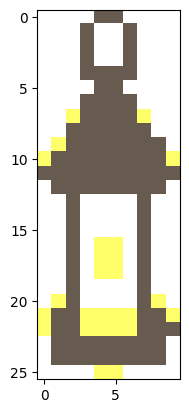

In [14]:
source_file = 'lantern-clipart-publicdomain.jpg'
# spotted-shag.jpg
# bell-boy-publicdomainvector.jpg
# lantern-clipart-publicdomain.jpg
# https://www.oldbookillustrations.com

image = Image.open('img/' + source_file)
cropped_img = Image.fromarray(crop_image(image), 'RGB')
new_img = pixelize(30, image, cropped_img)
new_img_arr = np.array(new_img).copy()
# new_img = increase_contrast(new_img, 1)
new_img = increase_sharpness(new_img, 1.5)
new_img = remove_light_colors(np.array(new_img), 130)
new_img = Image.fromarray(crop_image(new_img, banner=False))
nb_colors = 3
new_img = simplify_colors(new_img, nb_colors)
plt.imshow(new_img)
save_img(new_img)

## Create nonogram grid

In [57]:
colors = new_img.getcolors()
colors = [list(y) for (x, y) in colors]
colors

[[255, 255, 255], [103, 90, 79], [255, 255, 106]]

In [105]:
img_arr = np.array(new_img)
grid = np.zeros(shape = (img_arr.shape[0], img_arr.shape[1]))
for index, row in enumerate(img_arr):
    grid[index] = [colors.index(list(x)) for x in row]